In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split,GridSearchCV,ShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb ;
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.inspection import permutation_importance
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
from scipy.cluster import hierarchy
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from IPython.display import Image, display
from sklearn.metrics import precision_recall_curve


***Uçtan uca bir veri projesinde adımlar şu şekilde takip edilir:***
>1-Büyük resmi görme, üzerinde çalışılacak projeye hakim olma.
    Bu adım, başlamadan işe başlamadan önce dikkatli olunması gerken kısımdır. Burada başarı parametresinin ne olacağına, problemin çözümünün ne olması gerektiğine dair fikirler edinebilirsiniz. Örneğin, bir komutanın yanında veribilimci iseniz ve sizden, 2 yere farklı yerden birine düşme ihtimali olan bir bombaların nereye düşeceğini tahminlemenizi isterse (bir sınıflandırma problemidir) bölgelerin önemi arasında bir hiyerarşi yoksa accuracy score u  kullanabilirsiniz. Ama A bölgesi B bölgesinden önemli diyorsa, "A" bölgesini doğru tahminlemek B bölgesini doğru tahminlemekten daha önemli olacaktır ve performans  (etik tartışmaları bir kenara bırakıyorum :d ) ölçüm metriği de değişecektir. Performans metriğinin ne olacağı konusunda model performansını ölçerken daha ayrıntılı konuşacağız.
 
>2- Veriyi çekmek.

>3- Veriyi keşfetmek, görselleştirerek yeni çıkarımlar, yorumlar yapmak. Nihayetinde veriyi içselleştirmek gerekir. Hazır bir veriyi modele sokup, ardından başarılı sonuçlar almak için birkaç günlük bir eğitim hemen hemen yeterli olabilir. Daha değerlisi, yorum yapabilmek olacaktır.

>4- Verileri algoritmalar için hazır hale getirmek. 
    Bu aşamada aykırı gözlem analizi (örneğin 17 yaşında 3 çocuğu olan bir gözlem gibi(teorik olarak mümkün ama modeli etkilemesi gerekmeyecek kadar istisna değerler yani), eksik gözlem analizi, örneğin Support Vector Machine algoritmasını kullanacaksanız veriyi ölçeklendirmek(Bunun için SVM kullanmak şart değil) gibi, amacınıza göre değişecek bir sürü farklı senaryoyu uygulayıp veriyi hazır hale getirirsiniz.
    
> 5- farklı modeller denemek, umut vad edenleri seçmek.

> 6- seçilen modelere ince hiperparametre ayarları uygulayarak optium hiperparametreleri bulmak.

> 7- Çözümü sunmak


# 1- Büyük resmi görmek

### Olay

<em>Meme kanseri kadınlarda görülen kanserlerin 1/3 gibi büyük bir bölümünü oluşturan yayhın görülen bir kanser türüdür. İyi ya da kötü huylu olabilir. Özellikler, bir göğüs kitlesinin ince iğne aspiratının (FNA) dijitalleştirilmiş bir görüntüsünden hesaplanır. Görüntüde bulunan hücre çekirdeklerinin özelliklerini açıklarlar.</em>


### Hedef

<em>Örneklerin kötü(1) ve iyi(0) huylu olarak etiketlendiği veri setini kullanarak yeni örneklerin iyi huylu mu kötü huylu mu olduğunu tahminlemek. Bu, bir sınıflandırma problemidir. 

Burada şöyle bir soru sorulabilir; kanserli olanların tahmininin kesinliği mi daha önemli yoksa tüm örneklerin tahminlerinin kesinliği mi? Örneğin 70 kansersiz 30'u kanserli olan 100 örnek varsa, 60 kansersizi, 20 kanserliyi doğru tahmin ederek %80 başarılı olabiliriz. Ama 10 kansersizi daha yanlış tahmin etmek pahasına, toplam başarıdan ödün vererek 50 kanserliyi, 25 kansersizi doğru tahmin edip, toplam başarımızı %75 e düşürüp, kanserlileri doğru tahmin etme oranımızı artırabiliriz. 

Bu soruya şöyle bir cevap aldığımızı varsayıp devam edelim: "Bir hastanın kanserli olduğunu erken tahmin etmenin maliyeti, kanserli hastaları sonradan tespit ettiğimizde oluşan maliyetten daha az. Bununla birlikte bütçemiz sınırlı olduğu içim, tüm hastaları kanser kabul edip erken tedaviye başlayamıyoruz. Bütçemiz, kansersiz hastaların %20'si yanlış tahmin edilse bile bunu tolare edebilecek seviyede. Buna karşın kanserli hastaları doğru tahmin etme oranınızı ne kadar artırabilirseniz bizim için o kadar iyi olacaktır." 

Bu açıklamaya göre devam edeceğiz.

Yani biz, şu an kanserli olanları doğru tahminlemeye toplam başarıdan daha fazla önem vereceğiz. Yani, gerekirse kanser olmayanları kanserli tahmin etme oranımız artıracağız. Ama kanserli olanları tespit etme başarımızı artıracağız. </em> 

---

**Veriseti: ile ilgili kısa bir açıklama** 

    1.Column:
    
        Her bir örneğin kendine ait ID'si.

    2.Column:

        M = Malignant | Kötü Huylu - Present (M): Kanser
        B = Benign | İyi Huylu - Absent (B): Kanser değil
    
    3-32 Column:
    
        Görüntülerin sayısallaştırılması ile elde edilen numerik değerler.

---
---

# 2,3 | Veri setinin yüklenmesi / Keşifçi veri analizi

In [ ]:
data=pd.read_csv('data.csv')
keep_data=data.copy()

In [ ]:
data.head()

__.info()__ metodu, toplam satır sayısına, sütunlardaki null olmayan değerlerin sayısına, özelliklerin türüne hızlıca bir bakış için kullanışlıdır:

In [ ]:
data.info()

**Buraya bakarak ne düşünmeliyiz?:**
    
    >Tüm özelliklerin(columns) olması gereken tipte olduğunu(bazen kategorik olması gereken özellik numerik olabilir ve bunu düzeltmek gerekir.) görürüz.
    
    >'Unnamed: 32' isminde gereksiz bir özellik var, bundan kurtulmalıyız.
   

In [ ]:
# "Unnamed:32" 'yi silelim
data=data.drop(columns=['Unnamed: 32','id'], axis=1)
data.head(2)

**Eksik değer kontrolü**

In [ ]:
data.isnull().sum()

Eksik verimiz yok. Eğer olsaydı, problemimize göre çözüm üretmemiz gerekecekti. 

In [ ]:
data.describe().T

Bu tabloya bakarak bağımsız değişkenlerin dağılımı, standart sapması, ortalama değerine bakarak yayılımı hakkında fikir sahibi olabilirsiniz.

Uğraştığınız veri hakkında, verinin dağılımı hakkında bir fikir edinmenin başka bir hızlı yolu, her sayısal öznitelik için bir histogram çizmektir.Aynı zamanda özelliklerin dağılımlarında bir anormallik var mı diye dağılımlarına bakmak yararlıdır. 

In [ ]:
data.drop(columns=['diagnosis']).hist(bins=50, figsize=(25,20)); 

**Peki buradan ne çıkarabiliriz?**
> Genel olarak dağılımların gauss(normal) dağılımına sahip olduğunu görsemde, bazı dağılımlar birarın, __area_se__ gibi, gausstan biraz farklı olduğunu görüyorum. 

>__◾__ "hands-on-machine-learning" kitabında şu söylenir: **"Histogramların kuyruk ağırlıklı olmaları, yani sola kıyasla medyanın sağına daha fazla uzanmaları bazı Makine Öğrenimi algoritmalarının kalıpları algılamasını biraz zorlaştırabilir"** (Sebebini tam olarak bilmiyorum). O yüzden daha sonra bu nitelikleri daha çan şekilli dağılımlara sahip olacak şekilde dönüştürmek denenebilir. Bunu da **standardizasyon** ile yaparız. Standardizasyon, Gauss dağılımına ve farklı ortalamalara ve standart sapmalara sahip öznitelikleri, ortalaması 0 ve standart sapması 1 olan standart bir Gauss dağılımına dönüştürmek için kullanışlıdır.

>Bunun dışında değerlerin büyük ihtimalle ölçeklendirilmiş olduğunu da farkedebiliriz (büyük ihtimalle değerler olduğunun birkaç bin katı daha azı ya da daha fazlasıydı.)

Elimizde 2 farklı sınıf (kanser / kanser değil) olduğu için dağılımların bazıları, büyük ihtimalle, iki sınıf için birbirinden farklı dağılımlar gösterecektir. Özelliklerin dağılımlarının sınıflara göre değişimine bir bakmak hiç fena olmaz. Bunu da şöyle yapabiliriz: 

In [ ]:

fig, axes=plt.subplots(ncols=2, nrows=int(len(data.columns)/2), figsize=(10, 28))
fig.tight_layout(pad = 3.0)

for index,i in enumerate(data.drop(columns='diagnosis').columns):
    data01 = data[data.diagnosis=='M'][str(i)]
    data02 = data[data.diagnosis=='B'][str(i)]
    ax1 = sns.distplot(data01, color = 'blue', ax=axes[int(index/2)][int(index%2)],kde = True)
    ax2 = sns.distplot(data02, color = 'red', ax=axes[int(index/2)][int(index%2)], kde = True)

Görüleceği gibi, bazı özellikler, kanseri ve kanserli omayan hücreler için farklı dağılımlar gösterirken bazı özellikler hemen hemen aynı dağılıma sahip. Farklı dağılım gösteren özellikler kanserli/kanserli olmayan hücreleri belirlemede ayırt edici olabilir. Açıkçası, özelliklerin ne ifade ettiğine tam anlamıyla hakim değilim. Eğer bir hastanede veribilimci oalrak çalışıyor olsaydım, verileri hazırlayan ekip ve doktorlar ile bir görüşme yapardım .)

Az sonra özellikler ve hedef değişken arasındaki korelasyonlara baktığımızda, bu histogram grafiklerinde farklı dağılan özelliklerin yüksek korelasyona sahip olduğunu göreceğiz. Hatta hemen şimdi kısaca bir bakalım:

### But! Wait! Veriye daha dair derin bir içgörü elde etmeden önce, bağımlı değişkenlerimizin oranına bakıp, veriyi Train-Test setlerine ayıralım ve test setine hiç bakmadan devam edelim.

***From Hands-on-Machine Learning***: "Bu aşamada verilerin bir kısmını gönüllü olarak bir kenara bırakmak garip gelebilir. Sonuçta, verilere sadece hızlıca bir göz attınız ve kesinlikle hangi algoritmaları kullanacağınıza karar vermeden önce bu konuda çok daha fazlasını öğrenmelisiniz, değil mi? Bu doğru, ancak beyniniz inanılmaz bir örüntü tespit sistemidir, bu da aşırı uyuma eğilimli olduğu anlamına gelir: test setine bakarsanız, test verilerinde sizi bir seçmeye yönlendiren ilginç görünen bazı modellere rastlayabilirsiniz. belirli türden Makine Öğrenimi modeli. Test setini kullanarak genelleme hatasını tahmin ettiğinizde, tahmininiz çok iyimser olacak ve beklendiği kadar iyi performans göstermeyecek bir sistem başlatacaksınız. Buna, **veri gözetleme önyargısı** denir"

Kanser-Kanser olmama oranı

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(x='diagnosis', data=data, ax=axes[1])
axes[0].pie(data.diagnosis.value_counts(), colors=["r","g"],autopct='%1.1f%%',labels=['B','M']);

Grafiklere bakarak, kanserli olmama oranının kanserli olmaoranından biraz daha yüksek olduğunu görebiliriz.

>Train-Test şeklinde ayırma işini klasik **"train_test_split"** ile değil, **ShuffleSplit** ile yapacağız. Çünkü elimizdeki örnek sayısı epey az ve bu yüzden test ve train setlerindeki kanserli/kanserli olmama ornaının yakın olmasını istiyoruz. Aksi halde yanlılık olacaktır. 

In [ ]:
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=42)
for train_index, test_index in rs.split(data):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
y_train, X_train =train_set["diagnosis"],train_set.drop(columns=["diagnosis"])
y_test, X_test=test_set["diagnosis"],test_set.drop(columns=["diagnosis"])

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

In [ ]:
# Eğitim setimizdeki oranların hemen hemen aynı olduğunu görelim:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(x='diagnosis', data=train_set, ax=axes[1])
axes[0].pie(train_set.diagnosis.value_counts(), colors=["r","g"],autopct='%1.1f%%',labels=['B','M']);

görüldüğü gibi train setimizdeki kanser-kanser olmama oranı aynı. klasik train_test_split kullansaydık ta aynı olabilirdi. Ama olmayada bilirdi. ShuffleSplit eşit dağılması için olmaması için özellikle uğraşır..

### Nerede Kalmıştık?

Özellikler ve hedef değişken arasındaki korelasyonlara bir göz atacaktık. 

***Bunun için öncelikle kanserli olup olmama durumunu 1 ve 0 ile ifade edelim. ( orijinal veriye dokunmadan )***
>__M: 1 ->__  Kanser

>__B: 0 ->__  Kanser yok

In [ ]:

labelencoder = LabelEncoder()
#Şu an "eğitim setini" i değiştirmek istemediğimden, bir kopyasını kullanıyorum. Bu, verimli bir yöntem değil. Ama bu veri için bir sorun olmayacak.
data_copy=train_set.copy()
data_copy.diagnosis=labelencoder.fit_transform(train_set['diagnosis'])
data_copy.head(2)

In [ ]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
corr_matrix = data_copy.corr()
corr_matrix["diagnosis"].sort_values(ascending=False)

Eğer çıkıp bu özelliklerin dağılımına bakarsanız, farklı dağılım gösterenlerin, bağımsız değişken ile  genellikle yüksek korelasyona sahip olduklarını görebilirsiniz.

Umut vadeden özellikleri ele alarak özellikler arası korelasyonları şöyyle de inveleyebiliriz: 

In [ ]:
attributes=["concave points_worst","perimeter_worst",
"concave points_mean","radius_worst","perimeter_mean"]

In [ ]:
#burada sadece
scatter_matrix(data_copy[attributes], figsize=(20, 20));

Bu grafiklere bakarak: Bağımsız değişken ile yüksek ilişkisi bulunan özelliklerin **kendi aralarında da yüksek ilişkiye sahip olduğunu görüüyoruz**. Bu durum, yorumlanabilir bir model arayışında iseniz kabul edilemezdir. Aynı şekilde doğrusal regresyon modelleri için de berbattır. Çünkü... bu değişkenlerin birinin olmaması durumunda değişen pek bir şey olmaz, mesela "kadın olmak" sütunun olduğu verisetinde "erkek olmak" sütunun olmasına gerek yoktur çünkü "erkek olmak" "kadın olmak" ile ifade edilebilir. Bu hem gereksiz fazla özelliktir, hem de, daha önemlisi, dediğim gibi özelliklerin yorumlanabilirliği konusunda büyük sorunalr yaratır. Sağlıklı yorumlar yapılmasına engel olur.  

Bu grafikte yalnızca en ilişkili 5 özelliği çizdirdik. Çünkü tüm özellikleri dahil etseydik 30*30=900 grafik olacaktı, bunu şu an için yapmayalım :)
Ama bir çaresi var, aşağıdaki grafik işimize yarayacaktır:

> ->Alıntı: **"Genel olarak, veri kümenizde ilişkili özelliklere sahip olmaktan kaçınmanız önerilir. Gerçekten de, yüksek oranda ilişkili özelliklerden oluşan bir grup ek bilgi (veya sadece çok az) getirmeyecek, ancak algoritmanın karmaşıklığını artıracak ve böylece hata riskini artıracaktır."**

In [ ]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap=cmap)
plt.show()

Görüleceği gibi burada birkaç tane özelliğin neredeyse "1" korelasyon katsayısına sahip. Bu soruna "Multicollinearity" denir.  Bu sorunu çözmek için farklı yaklaşımlar vardır, Lasso regresyon,  algoritmalarını kullanarak özellik seçilebilir. Hangisinin en mantıklısı olduğu probleme göre değişkenlik gösterecektir. Bununla birlikte Özelliklerin birbiri ile ilişkili olması, yorumlanabilirliği etkilerken, tahmin başarısını pek etkilemez. 

Örneğin, "Erkek olmak" ve "Kadın olmak" gibi birbiri ile tamamen ilişkili olan 2 özelliğin olmsı halinde "cinsiyetin" bağımlı dğeişkene etkisi doğru yorumlanamaz ama tahmin başarısı da çok etkilenmez. Veri manipülasyonu kısmında bu durumu irdeleyeceğiz. 

Ben şu an sadece tahmin başarısı ile ilgilendiğim için bu sorunu çözmeyebilirim (neredeyse tüm gerçek hayat problemlerinde çözülmesi gerekir. Yorumlanabilirlik ihtiyacı olmasa da, algoritmalar için günler sürecek olan eğitim setlerini küçük boyutlara indirgemek neredeyse zorunluluktur). Ama yine de veri manipülasyonu bölümünde bir göz atacağım. Yüksek korelasyona sahip değişkenleri çıkartıp, tahmin başarısının pek değişmediğini gözle göreceğim: 


---
---
---
---

# Veriyi algoritmalar için hazırlama/ veri manipülasyonu

**İşlemleri elle yapmak yerine fonksiyonlar ile yapmak, birkaç iyi nedenden ötürü daha sağlıklı ve çok daha "güzeldir".**

>Bu, bu dönüşümleri herhangi bir veri kümesinde kolayca yeniden oluşturmanıza olanak tanır (örneğin, bir dahaki sefere yeni bir veri kümesi aldığınızda). 

>Gelecekteki projelerde yeniden kullanabileceğiniz bir dönüşüm işlevleri kitaplığınız olur.

>Yeni verileri algoritmalarınıza beslemeden önce dönüştürmek için canlı sisteminizde bu işlevleri kullanabilirsiniz.

>Bu, çeşitli dönüşümleri kolayca denemenizi ve hangi dönüşüm kombinasyonunun en iyi sonucu verdiğini görmenizi sağlar.

***öncelikle kanserli olup olmama durumunu 1 ve 0 ile ifade edelim. ( orijinal veriye dokunmadan )***
>__M: 1 ->__  Kanser

>__B: 0 ->__  Kanser yok

In [ ]:
labelencoder = LabelEncoder()
y_train=labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)


Başlamadan önce: Veriye uyguladığım her işlemden sonra skorlardaki değişimi görmek istiyorum. Onun için aşağıdaki fonksiyonu dahil edip, verideki değişikliklerden sonra uygulayacağım.

In [ ]:
y_train[:10]

In [ ]:

tree_clf=DecisionTreeClassifier(random_state=42)
xgb_clf= xgb.XGBClassifier(random_state=42)
knn_clf=KNeighborsClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True,random_state=42)
estimators_=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('xgb', xgb_clf), ('knn', knn_clf),('tree', tree_clf)]
def get_scores(X_train_,y_train=y_train, estm=estimators_,voting=True):

    estimators=[]
    for name, estimator in estm:
        estimators.append(estimator)
    
    if(voting==True):
        voting_clf = VotingClassifier(
            estimators=estm,
            voting='soft'
        )
        voting_clf.fit(X_train_, y_train)
        estimators.append(voting_clf)


        
    for  estimator in estimators:
        
        estimator.fit(X_train_, y_train)
        
        from sklearn.model_selection import cross_val_score
        
        print(estimator.__class__.__name__, "\nf1_score:{:.3f}-----recall: {:.3f}------ precision:{:.3f} ".format(
              cross_val_score( estimator, X_train_, y_train, cv=4, scoring="f1").mean(),
              cross_val_score( estimator, X_train_, y_train, cv=4, scoring="recall").mean(),
              cross_val_score( estimator, X_train_, y_train, cv=4, scoring="precision").mean()
             ), sep="   ")

In [ ]:
get_scores(X_train,estm=estimators_)

# Burada;



>__Recall__: doğru tahmin edilen pozitif/kanserli değerler oranı

>__Precision__: negatif tahmin edilen negatif/kansersiz değerler oranı

>__F1_score__: Hassasiyet ve geri çağırmanın harmonik ortalamasıdır. Normal ortalama tüm değerleri eşit olarak ele alırken, harmonik ortalama düşük değerlere çok daha fazla ağırlık verir. Sonuç olarak, sınıflandırıcı yalnızca hem geri çağırma hem de hassasiyet yüksekse yüksek bir F1 puanı alacaktır. Her zaman istenen şey değildir, bununla birlikte kullanışlıdır.

>__Accuracy_score__: Doğru tahmin edilen hedaf değişkenlerin oranı.


Yani; 

normalde negatif olan değerleri pozitif bulma sayımız artarsa precision//hassaslık/kesinlik azalır. 

normalde pozitif olanları negatif bulma sayımız artarsa, recall/hassaslık azalır.  

Daha iyi bir içgörü için şu görsele bakalım. Aşağıdaki görsel, optimum accuracy skorunu aldığımız tablo olsun:

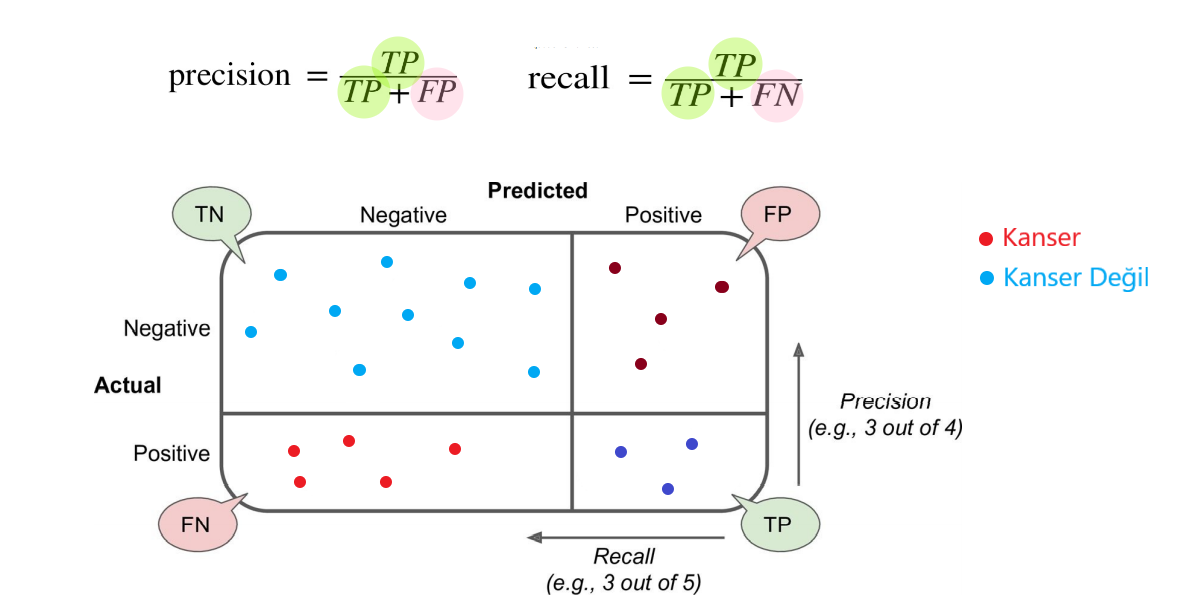

Şimdi, eğer biz, bir örneğin pozitif olara tahmin edileceği eşiği aşağı indirirsek; yani normalde 0.5 ihtimalden yukarıdan pozitifse, bu değeri 0.3 e çekersek, pozitif tahmin edilendeğerlerin sayısı artacaktır. Ama bu değerlerin bazıları "Gerçekte pozitifken, bazıları gerçekte "negatif" olacaktır. Yani biz, Yanlış tahmin edilen yanlışları artırmak pahasına pozitif deperleri tahmin edebilme ihtimalimizi artıracağız. Aşağıdaki görseller bu durumu daha iyi açıklayacaktır

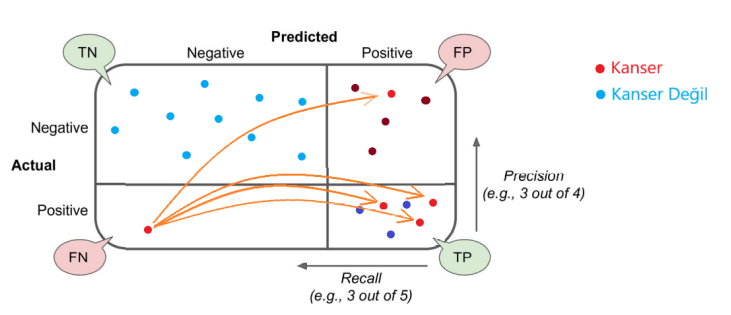

Biz eğer eşikdeğerini 0'a kadar düşürürsek, tüm değerlerin 1 olduğunu buluruz ama bu oldukça mantıksız. Burada yapmamız gereken, **recall**, **accuracy_score**, **presicion** arasında bir denge bulmaktır ve bu denge bizim ihtiyacımıza göre değişecektir. Örneğin, eğer her 1 pozitif olan tahmin değerimiz için 10 tl para harcanması gerekiyorsa, ve bizim bu iş için 500 tl bütçemiz varsa, 50 kişiyi tedavi edebiliriz. Eğer biz eşik değerini 0 yapar ve 100 kişinin 100'ünün de pozitif olduğunu tahminlersek, gerçekten kanserli olan hastaların bir çoğunu yoksaymamız gerekir. O yüzden, bir denge bulmamız gerekecektir. Bu dengeyi bulmak için, umut vadeden modelelri seçtikten sonra uğraşacağız.

Şu an için; kanserli hastaları %99 ihtimalle tespit eden ama kansersiz hastaların da % 20'sine kanserli diyen bir model, kanserli hastaların %90'ını tespit eden ve kansersiz hastaların %5'ine kanserli diyen bir modelden daha iyi olacağını söyleyebilriiz.

> -> Bu görseller, "Karmaşıklık Matrisleri" dir.

## Veri temizleme
Eksik değer yok dolayısıyla eksik değerler ile uğraşmayacağız. 

Kanserli olma durumunu 1, olmama durumunu 0 ile ifade edelim.
>__M: 1 ->__  Kanser

>__B: 0 ->__  Kanser yok

In [ ]:
labelencoder.fit(y_train)
y_train=labelencoder.transform(y_train)
y_test=labelencoder.transform(y_test)
y_train[:20],y_test[:20]

Hiçbir şey yapmadan önce skorumuza bakalım: Şu an 6 farklı sınıflandırma algoritması ve bu 5 algoritmanın ortalamasına göre tahmin üreten voting classifier'ı kullanacağız:

In [ ]:
get_scores(X_train, estm=estimators_)

XGBClassifier, RandomForestClassifier umut vadediyor. Bu iki algoritmayı ve votin classifierın üzeridne drumak mantıklı olur. Ama şu an tüm algoritmaları denemeye devam edecğim.

 Birbirileri ile ilişkili değişkenelrin olduğunu görmüştür. Bu değerlere odaklanalım ve ne yapabiliriz diye bir bakalım: 

Birbiri ile ilişkili değerlerin olduğunu ve bundan kurtulmamızı gerektirecek senaryoların olduğunu görmüştük. Şimdi bu senaryolardan birinde olduğumuzu düşünelim ve birbiri ile ilişkili olan, "fazlalık" olan özelliklerden kurtulup ne olacağına bakalım. Ben burada bu işi elle yapacağım. Ama PCA, regularization, forests kullanarak daha farklı yaklaşımlar ile çözmenin daha mantıklı olduğu senaryolar da vardır. Şu an hepsine odaklanmayacağım. 

Matrisin alt üçgeni üst üçgeni ile aynı değerleri içerdiğinden ve köşegendeki değerler daima 1 olduğundan, sadece alt üçgen matrisi alalım:

In [ ]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
corr_matrix_abs = train_set.corr()
#corr_matrix_abs["diagnosis"].sort_values(ascending=False)

In [ ]:
upper_tri = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape),k=1).astype(np.bool))
upper_tri

Ve yüksek korelasona sahip değerleri düşürelim: 

In [ ]:
#burada 0.95'ten yüksek korelasyona sahip değerleri sildik. Ama bu değer evrensel kabul gören bir değer değildir. Değişebilir. 
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

In [ ]:
train_set["diagnosis"]=y_train

droped_train_data=train_set.drop(columns=to_drop, axis=1)
droped_train_data.head(3)

In [ ]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
droped_train_data["diagnosis"]=y_train # asağıdaki heapmap'i çizdirmek için şunu ekledik.
corr_matrix_abs = droped_train_data.corr()
corr_matrix_abs["diagnosis"].sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix_abs, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap=cmap)
plt.show()

Ah evet, artık birbiri ile yüksek oranda ilişkiliözelliklerimizin sayısı daha az. Şimdi, birbiri ile ilişkili özelliklerin düşürüldüğü bu veri seti ile orjinal verisetimizi RandomForrest'a sokalım ve başarı skorumuzda pek bir fark olamdığını görelim:   

In [ ]:
X_train.shape, X_test.shape, droped_train_data.drop("diagnosis",axis=1).shape

    Özelliklerin tamamı dahil olduğundaki başarı skorumuz:

#### Orijinal özellikler  ile tahmin Accuracy_score: 

In [ ]:
get_scores(droped_train_data.drop("diagnosis",axis=1), estm=estimators_)

#### İlişkili özellikleri düşürülmüş özellikler ile Accuracy_score: 

Görüldüğü gibi, özelliklerin 7'sini düşürmemize rağmen oluşan fark pek büyük değil. Şu an için normal train-test setimizi değiştirmeden devam edelim... Bir başka yaklaşıma daha bakalım

In [ ]:
droped_train_data.shape

>***Bu yüksek ilişkili özelliklerden kurtulmanın bir başka yöntemi ise şudur: | ScikitLearn dokümanı |***

ScikitLearn dokümanı: __"Özellikler eşdoğrusal olduğunda, bir özelliğin permütasyonunun modellerin performansı üzerinde çok az etkisi olacaktır, çünkü ilişkili bir özellikten aynı bilgileri alabilir. Çok Satırlı özellikleri işlemenin bir yolu, Spearman sıra sırası korelasyonları üzerinde hiyerarşik kümeleme yapmak, bir eşik seçmek ve her kümeden tek bir özellik tutmaktır. İlk olarak, RandomForrest algoritmasını kullanaraközelliklerin önem sıralamasına bakalım sonra ilişkili özelliklerin bir ısı haritasını çizelim:"__


In [ ]:
from sklearn.inspection import permutation_importance
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns)
fig.tight_layout()
plt.show()

Özelliklerin önem sırasına bakılırsa, azımsanamayacak kadar fazla özelliğin neredeyse hiç etkisinin olmadığını görürüz. 

In [ ]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=X_train.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()

plt.show()

In [ ]:
cluster_ids = hierarchy.fcluster(corr_linkage, 0.8, criterion='distance') #eşik: 0.8
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train.iloc[:,selected_features]
X_test_sel = X_test.iloc[:,selected_features]

In [ ]:
X_train_sel.shape

In [ ]:
# kalan özellikler
X_train_sel.columns

ScikitLearn dokümanı: __Daha sonra, özelliklerimizi kümeler halinde gruplamak ve her kümeden bir özellik seçmek, veri kümemizden bu özellikleri seçmek ve yeni bir rastgele orman yetiştirmek için dendrogramın görsel olarak incelenmesiyle manuel olarak bir eşik seçiyoruz(1).__

In [ ]:
X_train_sel.head(4)

Artık 30 yerine 14 özelliğimiz var! Yine, yeni özelliklerimizin heapMap'ine bakacak olursak:


In [ ]:
# Özelliklerin kanserli olma olmama durumu ile ilgili korelasyonları: 
X_train_sel["diagnosis"]=y_train # asağıdaki heapmap'i çizdirmek için şunu ekledik.
corr_matrix = X_train_sel.corr()
corr_matrix["diagnosis"].sort_values(ascending=False)
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap=cmap)
plt.show()

Daha az ilişkili özellikleri elde ettik gibi görünüyor. Şimdi accuracy_score undaki değişime bakalım:

#### İlişkili özellikleri düşürülmüş (with 16 features) özellikler ile Accuracy_score: 

In [ ]:
X_train_sel=X_train_sel.drop(columns='diagnosis', axis=1)

In [ ]:
X_train_sel.shape

In [ ]:
#özellik düsürmeden once:
get_scores(X_train, estm=estimators_)

In [ ]:
#ozellik düsürdükten sonra
get_scores(X_train_sel, estm=estimators_)

bazı algoritmalar farklı tahminler yapmış olsa da XGBoost'ta neredeyse hiç dğeişim olmadı ve random forrestta oldukça küçük bir değişim gözlendi.

hiper parametre ayarı yapacağımız zaman bize zaman az da olsa(normalde gereksiz özellikleri düşürmek çok zaman kazandırsada şu an küçük bir veri seti ile uğraştığımız için az zaman kazandıracak.) zaman kazandıracağını düşünerek bu 14 özellik ile yoluma devam etmek istiyorum :)


## Aykırı gözlem analizi: 

Aykırı gözlemleri burada unun için farklı yollar vardır, PCA, DBSCAN, aracılığı ile de uygulanabilir. Ben burada LocalOutlierFactor'u kullanacağım: 

Aykırı gözlemleri boxplot ile gözlemleyelim. Sınırın dışındaki gözlemler, outlier değerler olara kdeğerlendirilecek.. 

Burada **Sınır** dediğim Quantileslara göre belirlenen noktalardır. Bilinmiyorsa araştırılmalı. Önemli. Ve bu aykırı gözlem analizi için, değişkenlerin ormal dağılıma sahip olması gerektiğini unutmayın. Şu an için, bizim değişkenlerimiz normal dağılıma yakınısıyor gibi göründüğü için normal olduğunu kabul ediyor ve devam ediyorum. 

In [ ]:
def plotBoxplot(columns, data, ncols=7, nrows=5):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20,12))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['#bad9e9', '#7ab6d6', '#3c8abd','#7ab6d6','#bad9e9', '#3c8abd','#7ab6d6',]


    for i, column in enumerate(columns):
        sns.boxplot(y=column, data=data, ax=axes[row][col], color=colors[col])

        if (i + 1) % 7 == 0:
            row += 1
            col = 0
        else:
            col += 1
plotBoxplot(X_train.columns, X_train)

BoxBlot grafiğinin betimlenmes:

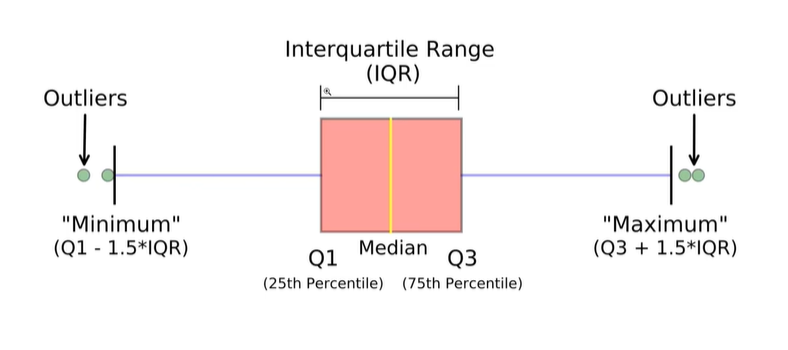

Biraz daha üstüne gidelim. Özel oalrak bir feature seçelim ve oitliers sınırlarını bulmayı bir deneyelim:

In [ ]:
sns.boxplot(x= X_train.texture_mean)

In [ ]:
def outlierLimit(column):
    q1, q3=np.nanpercentile(column, [25, 75])#columnın  %25 ve %75 lik yüzdeliğine gelen kısımları aldık
    IQR=q3-q1 #bu değer standarttır ->Interquartile range
    ust_limit=q3+IQR*1.5 # alt ve üst sınırları aldık. 
    alt_limit=q1-IQR*1.5
    return alt_limit, ust_limit
print(outlierLimit(X_train.texture_mean))

Evvet! Sınırları doğru bulduk. Öyleyse, her column için bu sınırları tek tek gezip outlier ları bulup, düzenleyebiliriz.

In [ ]:
def outliers_to_change(data):
    for col in data.columns:
        col_=data[col]#seçili sütunun dizisini aldık
        alt, ust=outlierLimit(col_)
        col_[col_<alt]=alt #dizide üst sınırdan büyük olanları üst sınıra küçük olanları alt sınıra eşitledik
        col_[col_>ust]=ust
        #print("column ", col, "alttan dusen= ", sum(col_[col_<alt]),"  ustten dusen:", len(col_[col_>alt]))
X_test_outliers_done=X_test_sel.copy()
X_train_outliers_done=X_train_sel.copy()
outliers_to_change(X_train_outliers_done) # traindeki outlierslar düzenlendi
outliers_to_change(X_test_outliers_done) # testteki outlierlar düzenlendi

Aykırı değerlerle uğraşmanın bu metoduna **Baskılama** denir.  

Üstte çizdiğimiz boxplot grafiklerini birdaha çizersek artık ayıkırı gözlemlerin olmadığını göreceğiz:

In [ ]:
sns.boxplot(x= X_train_outliers_done.texture_mean)

In [ ]:
plotBoxplot(X_train_outliers_done.columns, X_train_outliers_done, nrows=3)

In [ ]:
get_scores(X_train_sel)

In [ ]:
get_scores(X_train_outliers_done)

randomForres'ta azıcık bir artış, XGB'da azalış olmasıyla birlikte hemen hemen aynı değerleri elde ettik. Normalde skorun gelişmesi muhtemeldi. Ama verisetinin oldukça temiz olması sebebiyle pek bir fark göremedik. Bu, denenmesi genelde mantklı olan bir harekettir. Hatta genellikle şarttır. "Gürültülü" verisetlerinin temizlenmemesi muhtemel bile değildir. Ama şu an için ben ellemeden **X_train_sel** ile devam edeceğim.


Şimdi, özellikleri scale etmeden önce bir de;
### Çok Değişkenli Aykırı Gözlem Analizi

Şimdi de çok değişkenli aykırı gözlem analizi ile sonuçların değişimini gözlemleyelim. Tek değişkenli analizde tek tek özelliklere bakılırken, burada tespit edilmeye çalışılan bütünüyle bir gözlemin **"aykırılığıdır"**. Örneğin şunu tespit etmeye çalışırız: 17 yaşında 3 çocuk sahibi bir insan. Bu teroide mümkün olsa da, aykırı bir durumdur ve modeli olumsuz etkiler.

In [ ]:
clf=LocalOutlierFactor(n_neighbors=30, contamination=0.2)
clf.fit_predict(X_train_outliers_done)[:40]

In [ ]:
#Şimdi, elimizde her gözlem için skorlar var:
train_scores=clf.negative_outlier_factor_
np.sort(train_scores)[:50]

Bir eşik değeri seçip(bu eşik değeri bir kırılımın olduğu nokta olabilir. Örneğin skorlar 10,9,8,3,2,1 şeklinde gidiyorsa 8 ve yukarısı outlier gözlemler olarak seçilebilir.) Bunu daha iyi görmek için bir grafik çizlim:

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))
axes[0].plot(np.sort(train_scores))
axes[1].plot(np.sort(train_scores)[:35])

Grafiğe bakarsak, 2.1, 1.9, 1.4 değerlerinde bir kırılım olduğunu görebiliriz. Seçtiğimiz noktanın üstünü silip, outlierlardan kurtulmuş, outlierlardan etkilenmeyen bir eğitim seti oluşturalım.

In [ ]:
esik_deger=np.sort(train_scores)[8] #1.9'U EŞİK OLARAK SEÇTİK.
esik_deger
X_train_outliers_done_done=X_train_sel[train_scores>esik_deger]
y_train_instances=y_train[train_scores>esik_deger]

In [ ]:
X_train_outliers_done_done.head()

In [ ]:
y_train_instances[:10]

In [ ]:
get_scores(X_train_sel)

In [ ]:
get_scores(X_train_outliers_done_done,y_train=y_train_instances)

Yine değerlerin pek değişmediğini görüyoruz. Malesef. İster inanın ister inanmayın, bu durumun verinin temiz oluşuyla oldukça ilgili olabileceğini söyleyebiliriz :D

**X_train_sel** ile devam :)

## Feature scaling:

Feature Scaling/ Özelik Ölçeklendirme, veriye uygulanması gereken en önemli dönüştürmelerden birisidir. Bazı istisnalar dışında(mesela random forrest için özellik ölçeklendirmesi pek önemli değildir) algoritmalar ölçeklendirilmiş özellikler ile daha iyi performans gösterirler. 

**Not:** Bağımlı değişkeni, yani hedefi ölçeklendirmeye gerek yoktur.

In [ ]:
sc=StandardScaler().fit(X_train_sel)
X_train_sel_scaled=sc.transform(X_train_sel)
X_test__sel_scaled=sc.transform(X_test_sel)
get_scores(X_train_sel_scaled)

***Skorlardaki değişimi farkettiniz mi?***

Logistic regresyon bizim için pekte umut vadetmiyorken şu an hemen hemen en başarılı skorları üreten model. SVC'de aynı şekilde. Random forrest dışında tüm modellerin geliştiğini söyleyebiliriz.

# 5-6 -> Model seçimi ve hiperparametre ayarı

LogisticRegression, SVC ve XGBClassifier algoritmaları üzerinde hiper parametre ayarı yapacağım. En iyi sonucu veren modeli seçeceğim. En iyi hiper parametreleri seçtikten sonra bu hiper parametreler ile oluşturulmuş modeller üzerinden, problemimiz için optimum recall/precision dengesini bulmaya çalışacağız.

In [ ]:
def select_best_params(model, hiperparams):
    model = model
    #grid_search = GridSearchCV(model, param_grid, cv=5,
    #    scoring='f1', n_jobs=-1, refit=True)
    grid_search = GridSearchCV(model, hiperparams,refit=True, scoring="recall")
    grid_search.fit(X_train_sel_scaled, y_train)
    return grid_search.best_params_, grid_search.best_estimator_

In [ ]:
#Round1     --> 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1.0, 'scale_pos_weight': 3
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.2,0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],  
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
}
#round2 --> 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1.0, 'scale_pos_weight': 3 || aynı hiperparametreler.
#param_grid_xgb = {
#    'max_depth': [2, 3],
#    'learning_rate': [0.01,0.05,0.1],
#    'gamma': [0],  
#    'reg_lambda':[ 1.0], 
#    'scale_pos_weight':[3]
#}
print(select_best_params(xgb_clf, param_grid_xgb))

In [ ]:
tuned_xgb_clf= xgb.XGBClassifier(gamma= 0, learning_rate= 0.1, max_depth= 5, reg_lambda= 10.0, scale_pos_weight= 3, random_state=42)

In [ ]:
#round 1 -> {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
param_grid_svm = {'C': [0.1,1,10,100,300,1000], 'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf', 'poly', 'sigmoid']}
#    best params-->  {'C': 20, 'gamma': 0.1, 'kernel': 'poly'} 
result_for_svm=select_best_params(svm_clf,  param_grid_svm)
print("best params for svm=", result_for_svm[0])

In [ ]:
tuned_svm=SVC(C=100, gamma=0.1, kernel="rbf", probability= True, random_state=42)

***NOTE*** SVM() için model tuning yaparken, ilk deferde scale edilmiş özellikleri kullanmayı unutmuştum. Neredeyse 40 dakika boyunca çalıştı :( Yani, bazı algoritmalar için bu iş hayatidir .d

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000],       #---->> 'C': 1000, 'penalty': 'l2'
             'penalty':['l1', 'l2']}
print(select_best_params(log_clf, param_grid))


In [ ]:
tuned_log= LogisticRegression(C=100, penalty="l2", random_state=42)

***Hiperpaametre ayarlarını yaptık. Şimdi sonuççlara tekrar bakalım:***

In [ ]:
#Tune edildikten sonra
tuned_estimators=[('lr', tuned_log),('svc', tuned_svm), ('xgb', tuned_xgb_clf)]
get_scores(X_train_sel_scaled, estm=tuned_estimators, )

In [ ]:
# tune edilmeden önceki skorlarımız şuydu:
estimators_=[('lr', log_clf), ('svc', svm_clf), ('xgb', xgb_clf)]
get_scores(X_train_sel_scaled, estm=estimators_, )

Görüldüğü gibi görece daha iyi recall değerleri elde ettik. Ama şunu söylemeliyim ki önemsenecek kadar büyük değişimler elde etmedik, malesef. 

Her neyse, hangi modeli seçeceğimize karar vermeden önce son olarak __ROC__ eğrisine bakalım:

ROC eğrisi, Recall/Precision arasındaki dengeyi bulmamız için bizim için oldukça kullanışllı olacaktır. 

ROC eğrisi, True Positive(kanserli tahmin edilen kanserli hasta) oranının False Positive(kanserli tahmin edilen kansersiz hasta) oranı ile birlikte değişimini gösteren oldukça fazla kullanılan, kullanışlı bir grafiktir.

Roc eğrisi şöyle bir eğridir:

In [ ]:
#y_scores = cross_val_predict(tuned_svm, X_train_sel_scaled, y_train, cv=3,
#    method="decision_function")
#from sklearn.metrics import precision_recall_curve
#precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
#def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#    plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
#    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
#    plt.xlabel("Threshold")
#    plt.legend(loc="upper left")
#    plt.ylim([0, 1])
#plt.figure(figsize=(8, 4))
#plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.xlim([-3, 14])
#
#plt.show()



In [ ]:
y_scores = cross_val_predict(tuned_svm, X_train_sel_scaled, y_train, cv=3,
    method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.03, 1.03, -0.03, 1.03])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

Buradaki kesikli çizgi, tamamen rastgele tahmin üreten bir modelin üstedeceği TPR/FPR oranı olacaktır. 

Yani ROC eğrisi ne kadar sol üst köşeye yakınsa o kadar başarılı bir model üretildiği söylenebilir.

Şimdi tüm modellerimiz için bu eğriye bakalım ve son olarak bir modeli seçip, bu model üzerinden bir eşik değeri seçelip projeyi sunalım.

In [ ]:

def get_roc_curves(X_train_,y_train=y_train, estm=tuned_estimators,voting=True):
    estimators=[]
    for name, estimator in estm:
        estimators.append(estimator)
    
    if(voting==True):
        voting_clf = VotingClassifier(
            estimators=estm,
            voting='soft'
        )
        voting_clf.fit(X_train_, y_train)
        estimators.append(voting_clf)


    for  estimator in estimators:
        plt.rcParams['figure.figsize'] = [15, 10]
        estimator.fit(X_train_, y_train)
        
        from sklearn.model_selection import cross_val_score
        y_probas_forest = cross_val_predict(estimator, X_train_, y_train, cv=3,
            method="predict_proba")
        y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
        fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)
        plot_roc_curve(fpr_forest, tpr_forest, estimator.__class__.__name__ )
        plt.legend(loc="bottom right")
        from sklearn.metrics import roc_auc_score
        print(estimator.__class__.__name__  ,"\nAUC score: ", roc_auc_score(y_train, y_scores_forest))
    plt.show()

In [ ]:
get_roc_curves(X_train_sel_scaled)

hem grafikten hem skorlardan görebileceğimiz gibi en iyi AUC skorunu **"VotingClassifier"** dan aldık. Yolumuza **"VotingClassifier"** ile devam edeceğiz. Bunun için tekrar bir tanımlama yapalım: Yalnızca voting_clasifier'ın ROC eğrisine ve karmaşıklık matrisine bir göz atalım:

In [ ]:
#Roc Curve
voting_clf = VotingClassifier(
    estimators=tuned_estimators,
    voting='soft'
)
voting_clf.fit(X_train_sel_scaled, y_train)
y_probas_voting = cross_val_predict(voting_clf, X_train_sel_scaled, y_train, cv=3,
            method="predict_proba")
y_scores_voting = y_probas_voting[:, 1] # score = proba of positive class
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_train,y_scores_voting)
plt.rcParams['figure.figsize'] = [10, 6]
plot_roc_curve(fpr_voting, tpr_voting, voting_clf.__class__.__name__ )
plt.legend(loc="bottom right")

In [ ]:
y_preds_voting = cross_val_predict(voting_clf, X_train_sel_scaled, y_train, cv=3)

def display_conf_matrix(y_pred, y_actual):
    cm = metrics.confusion_matrix(y_actual, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
            ax.text(x=j, y=i,
                    s=cm[i, j], 
                    va='center', ha='center')
    plt.xlabel('Tahmin Edilen Değerler', )
    plt.ylabel('Gerçek Değerler')
    plt.show()
    print(classification_report(y_actual, y_pred))
y_probas_forest = cross_val_predict(voting_clf, X_train_sel_scaled, y_train, cv=3)
display_conf_matrix(y_preds_voting, y_train)

Bu grafiğe bakarak, benim projem için optimum TPR/FPR değiş tokuşunun gerçekleştiği noktayı belirleyebilirim. %20'lik bir yanlış pozitif oranını kabul ederek %97'nin üstünde gerçek pozitif oranı yakalayabileceğimi görüyorum. Şu grafiği çizelim, ve optimum thresholdumuzu belirleyip projemizi sunalım :)

In [ ]:
y_scores = cross_val_predict(voting_clf, X_train_sel_scaled, y_train, cv=3,
    method="predict_proba")
y_scores=y_scores[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.scatter([0.21,0.25,0.29,0.32],[0.95,0.95,0.95,0.95],s=30,color='k',marker='.')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


Buraya bakarak threshold'u şu siyah noktaların olduğu hizadaki recall'ın değişmediğini ve noktaların en sağının optimum nokta olabileceğini görüyorum. Hadi threshold'u oraya koyalım ve bakalım. Basitçe şöyle yapabiliriz:

In [ ]:
y_train_pred_90 = (y_scores > 0.32)

In [ ]:
precision_score(y_train, y_train_pred_90)

In [ ]:
recall_score(y_train, y_train_pred_90)

Artık test setine dokunabiliriz! Hadi şimdi test setinin skorlarına bir göz atalım

In [ ]:
y_test_probs=voting_clf.predict_proba(X_test__sel_scaled)[:, 1]
y_test_pred_032 = (y_test_probs > 0.32)
precision_score(y_test, y_test_pred_032), recall_score(y_test, y_test_pred_032)

In [ ]:
# Final Confusion matris:
display_conf_matrix(y_test_pred_032, y_test)

In [ ]:
Model, toplam 54 kanserli hastanın bulunduğu test setinde, 52 kanserli hastayı tespit edebildi ve 89 kansersiz hastanın 9'unun kanserli olduğunu tahmin etti. 

# 7-Çözümü Sunmak | Sonuç

Biz, birisi bize kanser şüphesi olan bir kişinin bilgilerini aldığımızda kanserli olan bir kişinin kanserli olduğunu %96'lık bir başarı ile tahmin edebiliriz. Bununla birlikte gerçekte negatif olan bireylerin %87'sini negatif tahmin ederken, %13'ünü pozitif tahmin eden bir model ürettik.

